# Calling dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
import squarify

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

### Read data set

In [4]:
first_set = pd.read_csv('data/winemag-data_first150k.csv',index_col=0)
second_set = pd.read_csv('data/winemag-data-130k-v2.csv', index_col=0)

In [5]:
wine_data = pd.concat([first_set,second_set], axis=0)
wine_data.info()

/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 129970
Data columns (total 13 columns):
country                  280833 non-null object
description              280901 non-null object
designation              197701 non-null object
points                   280901 non-null int64
price                    258210 non-null float64
province                 280833 non-null object
region_1                 234594 non-null object
region_2                 111464 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  280900 non-null object
winery                   280901 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 30.0+ MB


In [6]:
wine_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,NaN,NaN,NaN,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,NaN,NaN,NaN,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,NaN,NaN,NaN,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,NaN,NaN,NaN,Provence red blend,Domaine de la Bégude


In [22]:
wine_data.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,280833,280901,197701,280901.000000,258210.000000,280833,234594,111464,103727,98758,129971,280900,280901
unique,50,169430,47239,NaN,NaN,490,1332,18,19,15,118840,756,19186
top,US,A little bit funky and unsettled when you pop ...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Williams Selyem
freq,116901,7,4761,NaN,NaN,80755,10689,24122,25514,25514,11,27563,585
mean,NaN,NaN,NaN,88.146934,34.177162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.151528,38.611708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Analysis

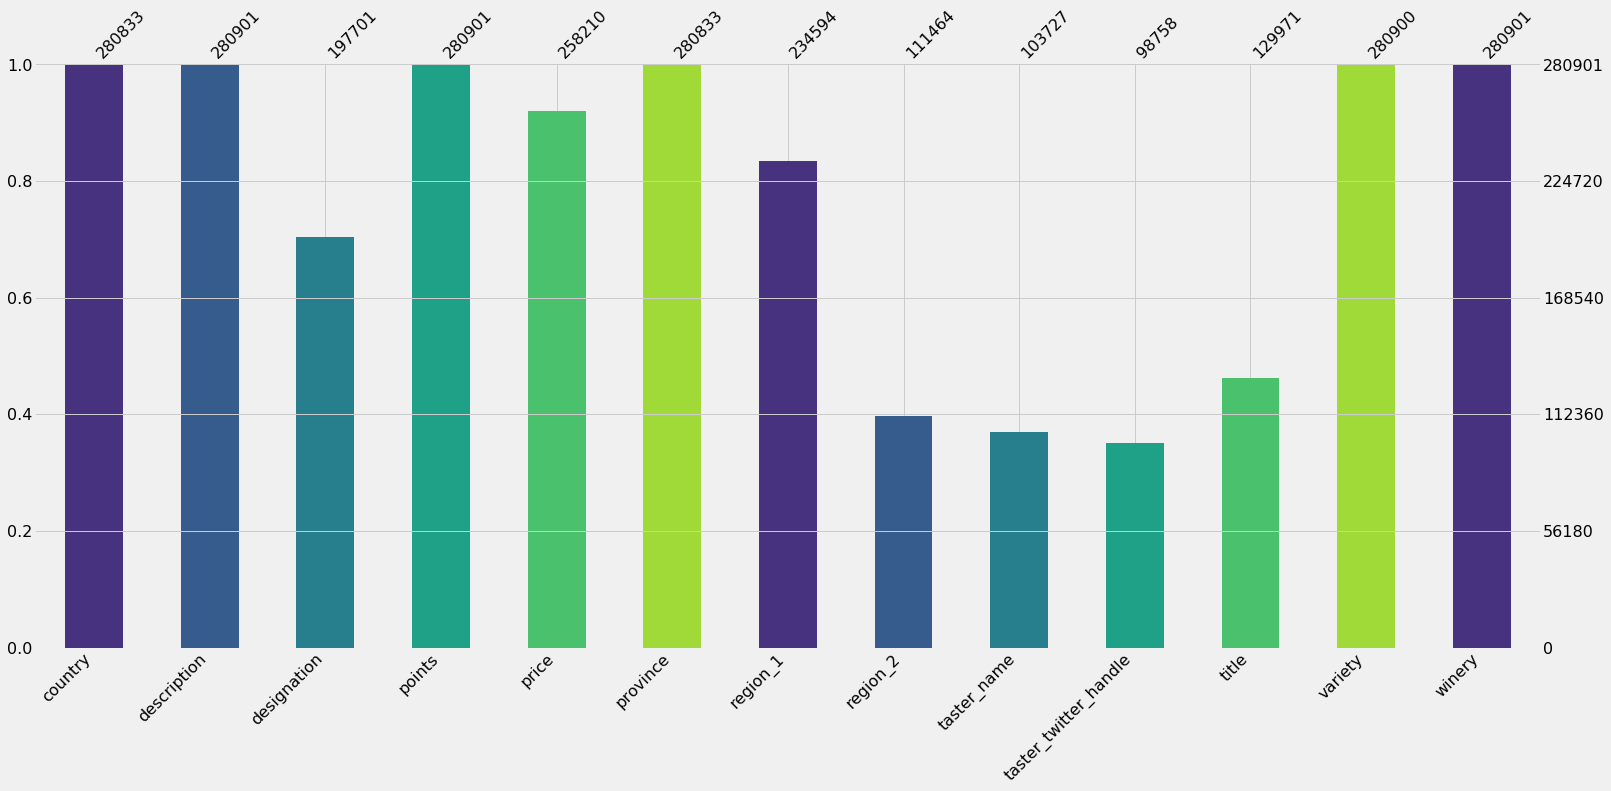

In [23]:
msno.bar(wine_data,color = sns.color_palette('viridis'))

From following chart of missing values, we can filter out some columns which may difficult to use

points, region2, taster_name, taster_twitter_handle, title, designation

### Distribution of countries

Number of country list in data: 50


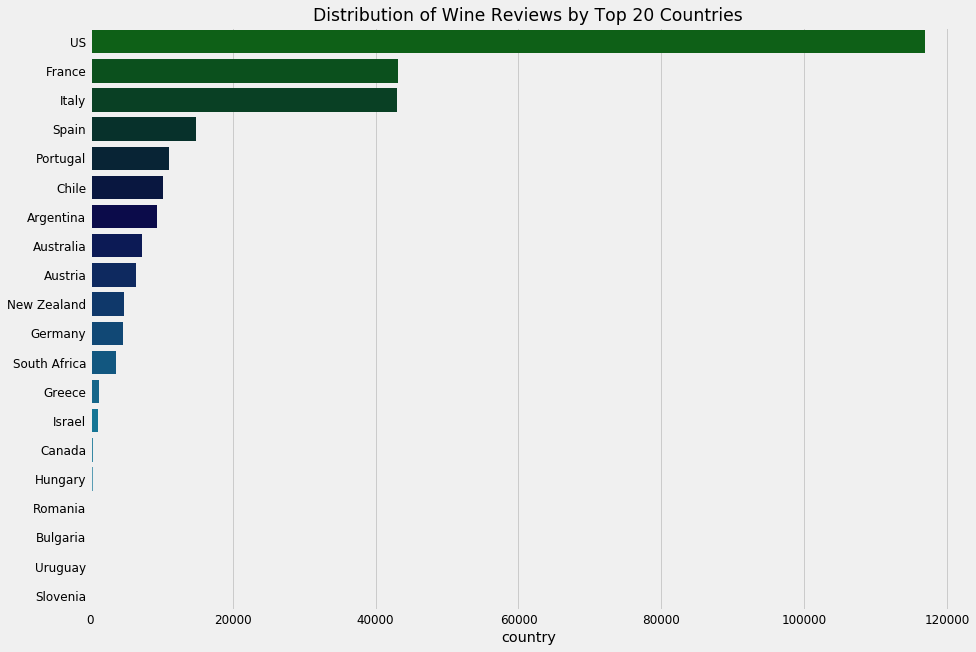

In [45]:
print('Number of country list in data:',wine_data['country'].nunique())
plt.figure(figsize=(14,10))
cnt = wine_data['country'].value_counts().to_frame()[0:20]
#plt.xscale('log')
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wine Reviews by Top 20 Countries');

In [40]:
sum(wine_data['country'].isin(['France','US','Italy']))

203110

In [41]:
wine_data['country'].nunique()

50

### Distribution of wine price

Text(0.5, 1.0, 'Boxplot of price')

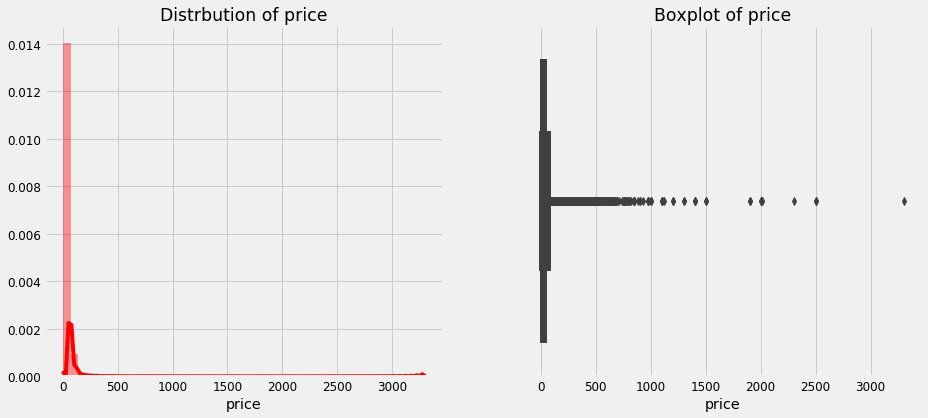

In [44]:
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(wine_data['price'].fillna(wine_data['price'].median()),color='r',ax=ax1)
ax1.set_title('Distrbution of price')
sns.boxplot(x = wine_data['price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')